<a href="https://colab.research.google.com/github/CarolyneS14/DataLab_BigTech/blob/main/BigTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color = red>Importando bibliotecas:**

Importando as bibliotecas ultilizadas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from tabulate import tabulate
import plotly.express as px
from scipy.stats import ttest_ind
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

#**<font color = red>Importando as bases de dados:**

Importando as bases de dados ultilizadas.


In [48]:
# Baixar o arquivo do GitHub
!wget -O /content/big_tech_stock_prices.xlsx 'https://github.com/CarolyneS14/DataLab_BigTech/raw/main/stock_price_dataset/big_tech_stock_prices.xlsx'

# Ler o arquivo com pandas
df_acoes = pd.read_excel('/content/big_tech_stock_prices.xlsx')

--2024-08-01 04:50:21--  https://github.com/CarolyneS14/DataLab_BigTech/raw/main/stock_price_dataset/big_tech_stock_prices.xlsx
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CarolyneS14/DataLab_BigTech/main/stock_price_dataset/big_tech_stock_prices.xlsx [following]
--2024-08-01 04:50:22--  https://raw.githubusercontent.com/CarolyneS14/DataLab_BigTech/main/stock_price_dataset/big_tech_stock_prices.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2082696 (2.0M) [application/octet-stream]
Saving to: ‘/content/big_tech_stock_prices.xlsx’

/content/big_tech_s 100%[===================>]   1.99M 

In [49]:
#Conectar ao arquivo do GitHub
url = 'https://raw.githubusercontent.com/CarolyneS14/DataLab_BigTech/main/stock_price_dataset/big_tech_companies.csv'

#Chamar meu DataFrame
df_companias = pd.read_csv(url)

In [50]:
#Base de dados unificada salva no GitHub
url = 'https://raw.githubusercontent.com/CarolyneS14/DataLab_BigTech/main/bigtech_stock_classificado.csv'

#Chamar meu DataFrame unificado
df_classificado = pd.read_csv(url)

#**<font color = red>Limpeza:**

Limpeza da Base de Dados.


In [5]:
# Exibir as primeiras linhas do DataFrame acoes
df_acoes.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0


In [6]:
# Exibir as primeiras linhas do DataFrame companias
df_companias.head()

,stock_symbol,company
0,AAPL,Apple Inc.
1,ADBE,Adobe Inc.
2,AMZN,"Amazon.com, Inc."
3,CRM,"Salesforce, Inc."
4,CSCO,"Cisco Systems, Inc."


In [7]:
# Informações sobre a tabela:
df_acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45090 entries, 0 to 45089
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45090 non-null  object        
 1   date          45089 non-null  datetime64[ns]
 2   open          45089 non-null  float64       
 3   high          45089 non-null  float64       
 4   low           45089 non-null  float64       
 5   close         45089 non-null  float64       
 6   adj_close     45089 non-null  float64       
 7   volume        45089 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.8+ MB


In [8]:
# Informações sobre a tabela:
df_companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stock_symbol  14 non-null     object
 1   company       14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [9]:
#Remover Duplicados
df_acoes.drop_duplicates(inplace=True)
df_companias.drop_duplicates(inplace=True)

In [10]:
#Remover valores ausentes
df_acoes.dropna(inplace=True)
df_companias.dropna(inplace=True)

In [11]:
#Remover Duplicados
df_classificado.drop_duplicates(inplace=True)

#Remover valores ausentes
df_classificado.dropna(inplace=True)

In [12]:
# Exibir as primeiras linhas do DataFrame indicando os valores Nulos na coluna 'Volume'
print(df_classificado['volume'].isnull().sum())

0


In [13]:
# Substituir valores nulos na coluna 'Volume' por 0
df_classificado['volume'] = df_classificado['volume'].fillna(0)

# Converter a coluna 'Volume' para o tipo inteiro
df_classificado['volume'] = df_classificado['volume'].astype(int)

# Exibir as primeiras linhas do DataFrame resultante
print(df_classificado['volume'].isnull().sum())  # Deve exibir 0 se não houver valores nulos restantes

0


#**<font color = red>Análise Descritiva:**

Análise da Base de Dados.

In [14]:
# Informações sobre a tabela após remover duplicados e ausentes:
df_companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stock_symbol  14 non-null     object
 1   company       14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [15]:
# Informações sobre a tabela após remover duplicados e ausentes:
df_acoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.1+ MB


Index alterado de 45090 para 45088.

In [16]:
# Criar colunas separadas para dia, mês e ano
df_acoes['day'] = df_acoes['date'].dt.day
df_acoes['month'] = df_acoes['date'].dt.month
df_acoes['year'] = df_acoes['date'].dt.year

# Converter as colunas para valores inteiros
df_acoes['day'] = df_acoes['day'].astype(int)
df_acoes['month'] = df_acoes['month'].astype(int)
df_acoes['year'] = df_acoes['year'].astype(int)

# Exibir o DataFrame resultante
print(df_acoes)

      stock_symbol       date        open        high         low       close  \
0             AAPL 2010-01-04    7.622500    7.660714    7.585000    7.643214   
1             AAPL 2010-01-05    7.664286    7.699643    7.616071    7.656429   
2             AAPL 2010-01-06    7.656429    7.686786    7.526786    7.534643   
3             AAPL 2010-01-07    7.562500    7.571429    7.466071    7.520714   
4             AAPL 2010-01-08    7.510714    7.571429    7.466429    7.570714   
...            ...        ...         ...         ...         ...         ...   
45083         TSLA 2022-12-22  136.000000  136.630005  122.260002  125.349998   
45084         TSLA 2022-12-23  126.370003  128.619995  121.019997  123.150002   
45085         TSLA 2022-12-27  117.500000  119.669998  108.760002  109.099998   
45086         TSLA 2022-12-28  110.349998  116.269997  108.239998  112.709999   
45087         TSLA 2022-12-29  120.389999  123.570000  117.500000  121.820000   

        adj_close       vol

In [17]:
#Análise Descritiva, excluindo a coluna date
df_descritiva = df_acoes.drop(columns=['date', 'day', 'month', 'year']).describe()
df_descritiva

,open,high,low,close,adj_close,volume
count,45088.000000,45088.000000,45088.000000,45088.000000,45088.000000,4.508800e+04
mean,89.266584,90.369825,88.111930,89.271306,85.209631,5.297813e+07
std,101.626955,103.001073,100.124399,101.592916,100.995967,9.324730e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,25.670000,25.930135,25.360001,25.660000,22.076433,9.629425e+06
50%,47.930000,48.459999,47.465000,47.970001,45.377333,2.646315e+07
75%,128.662502,129.848900,127.253945,128.640609,113.672460,5.839768e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


*   Após a análise e limpeza da base, fiz a união em uma única base, à qual chamei de df_join.

In [18]:
# Unir as tabelas com base na coluna 'stock_symbol'
# Fazendo um merge 'inner' para garantir que apenas as ações com correspondência em ambas as tabelas sejam incluídas
df_join = pd.merge(df_acoes, df_companias, on='stock_symbol', how='inner')

# Exibir as primeiras linhas do DataFrame resultante
print("\nTabela Unificada:")
print(df_join.head())


Tabela Unificada:
  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume  day  month  year     company  
0  493729600.0    4      1  2010  Apple Inc.  
1  601904800.0    5      1  2010  Apple Inc.  
2  552160000.0    6      1  2010  Apple Inc.  
3  477131200.0    7      1  2010  Apple Inc.  
4  447610800.0    8      1  2010  Apple Inc.  


In [19]:
#Analise descritiva dos dados da base unificada
df_descritiva = df_join.drop(columns=['date', 'day', 'month', 'year']).describe()
df_descritiva

,open,high,low,close,adj_close,volume
count,45088.000000,45088.000000,45088.000000,45088.000000,45088.000000,4.508800e+04
mean,89.266584,90.369825,88.111930,89.271306,85.209631,5.297813e+07
std,101.626955,103.001073,100.124399,101.592916,100.995967,9.324730e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,25.670000,25.930135,25.360001,25.660000,22.076433,9.629425e+06
50%,47.930000,48.459999,47.465000,47.970001,45.377333,2.646315e+07
75%,128.662502,129.848900,127.253945,128.640609,113.672460,5.839768e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


In [20]:
#Visualizar base de dados unificada
df_join.head()

,stock_symbol,date,open,high,low,close,adj_close,volume,day,month,year,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,4,1,2010,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,5,1,2010,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,6,1,2010,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,7,1,2010,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,8,1,2010,Apple Inc.


In [21]:
# Informações sobre a tabela unificada:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  float64       
 8   day           45088 non-null  int64         
 9   month         45088 non-null  int64         
 10  year          45088 non-null  int64         
 11  company       45088 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 4.1+ MB


In [53]:
# Informações sobre a tabela classificada:
df_classificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stock_symbol    45088 non-null  object 
 1   date            45088 non-null  object 
 2   open            45088 non-null  float64
 3   high            45088 non-null  float64
 4   low             45088 non-null  float64
 5   close           45088 non-null  float64
 6   adj_close       45088 non-null  float64
 7   volume          45088 non-null  float64
 8   day             45088 non-null  int64  
 9   month           45088 non-null  int64  
 10  year            45088 non-null  int64  
 11  company         45088 non-null  object 
 12  variacao_media  45088 non-null  float64
 13  classificacao   45088 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 4.8+ MB


In [54]:
# Visuzlizações sobre a tabela classificada:
df_classificado.head()

,stock_symbol,date,open,high,low,close,adj_close,volume,day,month,year,company,variacao_media,classificacao
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,4,1,2010,Apple Inc.,0.075714,Baixa Volatilidade
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,5,1,2010,Apple Inc.,0.083572,Baixa Volatilidade
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,6,1,2010,Apple Inc.,0.160000,Baixa Volatilidade
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,7,1,2010,Apple Inc.,0.105358,Baixa Volatilidade
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,8,1,2010,Apple Inc.,0.105000,Baixa Volatilidade


In [55]:
# Exibir as primeiras linhas da coluna 'Volume'
print("Primeiras linhas da coluna 'Volume':")
print(df_classificado['volume'].head())

# Exibir as últimas linhas da coluna 'Volume'
print("\nÚltimas linhas da coluna 'Volume':")
print(df_classificado['volume'].tail())

# Informações básicas da coluna 'Volume'
print("\nInformações básicas da coluna 'Volume':")
print(df_classificado['volume'].info())

# Estatísticas descritivas da coluna 'Volume'
print("\nEstatísticas descritivas da coluna 'Volume':")
print(df_classificado['volume'].describe())

# Valores únicos e contagem
print("\nValores únicos e contagem na coluna 'Volume':")
print(df_classificado['volume'].value_counts())

# Valores nulos
print("\nContagem de valores nulos na coluna 'Volume':")
print(df_classificado['volume'].isnull().sum())

Primeiras linhas da coluna 'Volume':
0    493729600.0
1    601904800.0
2    552160000.0
3    477131200.0
4    447610800.0
Name: volume, dtype: float64

Últimas linhas da coluna 'Volume':
45083    210090300.0
45084    166989700.0
45085    208643400.0
45086    221070500.0
45087    221923300.0
Name: volume, dtype: float64

Informações básicas da coluna 'Volume':
<class 'pandas.core.series.Series'>
RangeIndex: 45088 entries, 0 to 45087
Series name: volume
Non-Null Count  Dtype  
--------------  -----  
45088 non-null  float64
dtypes: float64(1)
memory usage: 352.4 KB
None

Estatísticas descritivas da coluna 'Volume':
count    4.508800e+04
mean     5.297813e+07
std      9.324730e+07
min      5.892000e+05
25%      9.629425e+06
50%      2.646315e+07
75%      5.839768e+07
max      1.880998e+09
Name: volume, dtype: float64

Valores únicos e contagem na coluna 'Volume':
volume
4659500.0      4
60512000.0     4
2537100.0      4
6043400.0      3
5642900.0      3
              ..
16597200.0     1
1

In [56]:
# Informações sobre a tabela classificada:
df_classificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stock_symbol    45088 non-null  object 
 1   date            45088 non-null  object 
 2   open            45088 non-null  float64
 3   high            45088 non-null  float64
 4   low             45088 non-null  float64
 5   close           45088 non-null  float64
 6   adj_close       45088 non-null  float64
 7   volume          45088 non-null  float64
 8   day             45088 non-null  int64  
 9   month           45088 non-null  int64  
 10  year            45088 non-null  int64  
 11  company         45088 non-null  object 
 12  variacao_media  45088 non-null  float64
 13  classificacao   45088 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 4.8+ MB


#**<font color = red>Análise Exploratória:**

Análise da Base de Dados.

## Segmentação
-  A segmentação de dados é frequentemente usada para identificar padrões, anomalias e relações entre variáveis. A segmentação de dados tambem é usada para descrever e resumir as características dos dados de forma estruturada. Isso pode incluir a criação de grupos com base em características específicas para entender melhor a distribuição e as tendências dentro dos dados.

- Encontrar o grupo de empresas e classificá-las do menor para o maior em termos de variação média no período de 13 anos.

- Cálculo da (variação_media): A variação média é o cálculo da média entre o preço mais alto e o preço mais baixo da ação para aquele dia!

In [57]:
# Calcular a variação diária (diferença entre high e low)
df_join['variacao_media'] = df_join['high'] - df_join['low']

# Calcular a variação média por empresa
variacao_media_por_empresa = df_join.groupby('company')['variacao_media'].mean().reset_index()

# Encontrar as empresas com menor variação média
empresas_com_menor_variacao = variacao_media_por_empresa.nsmallest(14, 'variacao_media')

print("Ordem de Empresas com menor variação média entre o preço mais alto e baixo no período de 13 anos:")
print(tabulate(empresas_com_menor_variacao, headers='keys', tablefmt='pretty'))

Ordem de Empresas com menor variação média entre o preço mais alto e baixo no período de 13 anos:
+----+---------------------------------------------+--------------------+
|    |                   company                   |   variacao_media   |
+----+---------------------------------------------+--------------------+
| 4  |             Cisco Systems, Inc.             | 0.6172975025985936 |
| 5  |              Intel Corporation              | 0.7819963882604707 |
| 11 |             Oracle Corporation              | 0.8654784860898808 |
| 1  |                Alphabet Inc.                | 0.9967609244879241 |
| 3  |                 Apple Inc.                  | 1.1373286738000612 |
| 2  |              Amazon.com, Inc.               | 1.427523530418832  |
| 9  |             NVIDIA Corporation              | 1.9586234928156527 |
| 8  |            Microsoft Corporation            | 2.031653966065423  |
| 6  | International Business Machines Corporation |  2.23051471537756  |
| 12 |        

* Classificação das empresas segmentadas em “Alta Volatilidade” e “Baixa Volatilidade”

In [58]:
# Calcular a variação média por empresa
variacao_media_por_empresa = df_join.groupby('company')['variacao_media'].mean().reset_index()

# Determinar o ponto de corte para a classificação
# Usaremos a mediana da variação média como ponto de corte
ponto_de_corte = variacao_media_por_empresa['variacao_media'].median()

# Classificar as empresas
variacao_media_por_empresa['classificacao'] = variacao_media_por_empresa['variacao_media'].apply(
    lambda x: 'Alta Volatilidade' if x > ponto_de_corte else 'Baixa Volatilidade'
)

# Exibir a classificação das empresas
print("Classificação Decrescente das Empresas:")
print(tabulate(variacao_media_por_empresa.sort_values(by='variacao_media', ascending=False)))

Classificação Decrescente das Empresas:
--  -------------------------------------------  --------  ------------------
10  Netflix, Inc.                                6.01406   Alta Volatilidade
 0  Adobe Inc.                                   4.58704   Alta Volatilidade
 7  Meta Platforms, Inc.                         3.75419   Alta Volatilidade
13  Tesla, Inc.                                  2.77384   Alta Volatilidade
12  Salesforce, Inc.                             2.72033   Alta Volatilidade
 6  International Business Machines Corporation  2.23051   Alta Volatilidade
 8  Microsoft Corporation                        2.03165   Alta Volatilidade
 9  NVIDIA Corporation                           1.95862   Baixa Volatilidade
 2  Amazon.com, Inc.                             1.42752   Baixa Volatilidade
 3  Apple Inc.                                   1.13733   Baixa Volatilidade
 1  Alphabet Inc.                                0.996761  Baixa Volatilidade
11  Oracle Corporation         

In [59]:
# Adicionar a Classificação ao DataFrame Unificado
# Merge para adicionar a classificação ao DataFrame unificado (df_join)
df_classificado = pd.merge(df_join, variacao_media_por_empresa[['company', 'classificacao']], on='company', how='left')

# Verificar a União
print(df_classificado.head())

# Salvar a tabela unificada em um novo arquivo CSV
df_classificado.to_csv('bigtech_stock_classificado.csv', index=False)

  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume  day  month  year     company  variacao_media  \
0  493729600.0    4      1  2010  Apple Inc.        0.075714   
1  601904800.0    5      1  2010  Apple Inc.        0.083572   
2  552160000.0    6      1  2010  Apple Inc.        0.160000   
3  477131200.0    7      1  2010  Apple Inc.        0.105358   
4  447610800.0    8      1  2010  Apple Inc.        0.105000   

        classificacao  
0  Baixa Volatilidade  
1  Baixa Volatilidade  
2  Baixa Volatilidade  
3  Baixa Volatilidade  
4  Baixa Volat

## Medidas de Dispersão
- As medidas de dispersão fornecem informações sobre a variabilidade dos dados. Vamos calcular algumas medidas de dispersão para a variação média, como o desvio padrão, a variância e o intervalo interquartil (IQR).

In [60]:
# Calcular medidas de dispersão para a variação média
variacao_media = df_classificado['variacao_media']

desvio_padrao = variacao_media.std()
variancia = variacao_media.var()
iqr = variacao_media.quantile(0.75) - variacao_media.quantile(0.25)

print(f"Desvio Padrão: {desvio_padrao}")
print(f"Variância: {variancia}")
print(f"Intervalo Interquartil (IQR): {iqr}")

Desvio Padrão: 3.6331734374681126
Variância: 13.199949226723861
Intervalo Interquartil (IQR): 1.883134000000009


**Análise:** Na análise dos resultados obtidos acima, podemos concluir que os dados presentes na base possuem uma alta dispersão, ou seja, não estão muito próximos da média.

## Análise de Coorte
- A análise de coorte é uma técnica usada para estudar o comportamento de grupos específicos de usuários ao longo do tempo. No contexto do seu conjunto de dados, podemos considerar uma coorte como um grupo de dados agrupados por ano ou mês e analisar o comportamento das ações ao longo do tempo.


Análise de coorte agrupando os dados por ano e mês, e calculando a variação média ao longo do tempo.

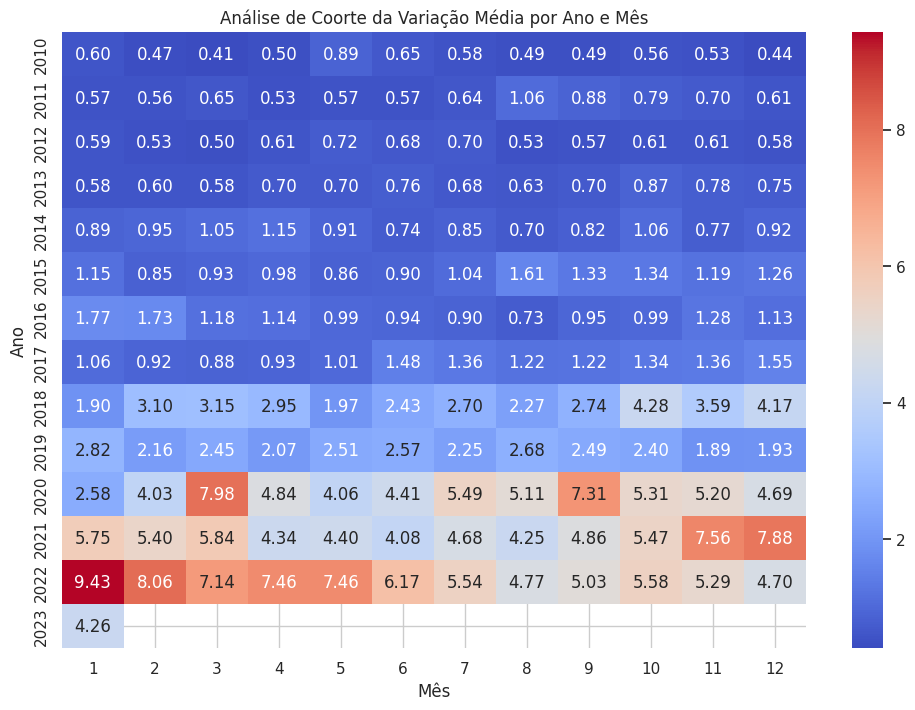

In [61]:
# Agrupar os dados por ano e mês
cohort_data = df_classificado.groupby(['year', 'month']).agg({
    'close': 'mean',
    'variacao_media': 'mean'
}).reset_index()

# Pivotar os dados para uma tabela de coorte
cohort_pivot = cohort_data.pivot(index='year', columns='month', values='variacao_media')

# Plotar a tabela de coorte
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Análise de Coorte da Variação Média por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

**Análise:** O gráfico de coorte mostra que ocorre uma alteração na variação média após o ano de 2014, porém nos mostra uma alteração considerável após os anos de 2020.

## Cálculo do Risco Relativo
- O risco relativo (RR) é uma medida estatística usada para comparar a probabilidade de um evento ocorrer em dois grupos diferentes.

O risco relativo é uma medida de associação que compara a probabilidade de um evento ocorrer em dois grupos. Vamos calcular o risco relativo da classificação de volatilidade "Alta Volatilidade" em relação à "Baixa Volatilidade".

Interpretação do Risco Relativo:

**RR = 1:** Não há diferença na probabilidade de ocorrência do evento entre os dois grupos.
**RR > 1:** A exposição está associada a um aumento do risco do evento.
**RR < 1:** A exposição está associada a uma redução do risco do evento

1. Calcular o risco relativo da classificação de volatilidade "Alta Volatilidade" em relação à "Baixa Volatilidade" por ano:

In [89]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df_classificado['year'], df_classificado['classificacao'])

# Definindo o grupo de referência como 'Baixa Volatilidade'
alta_volatilidade = contingency_table['Alta Volatilidade']
baixa_volatilidade = contingency_table['Baixa Volatilidade']

# Probabilidade de Alta Volatilidade
p_alta = alta_volatilidade / (alta_volatilidade + baixa_volatilidade)

# Probabilidade de Baixa Volatilidade
p_baixa = baixa_volatilidade / (alta_volatilidade + baixa_volatilidade)

# Calcular o risco relativo
risco_relativo = p_alta / p_baixa

# Criar um DataFrame com os resultados
risco_relativo_df = pd.DataFrame({
    'Ano': risco_relativo.index,
    'Risco Relativo': risco_relativo.values
})

# Exibir a tabela formatada
print("Risco Relativo por Ano:")
print(tabulate(risco_relativo_df, headers=["Ano", "Risco Relativo"], tablefmt="grid"))

Risco Relativo por Ano:
+----+-------+------------------+
|    |   Ano |   Risco Relativo |
+====+=======+==================+
|  0 |  2010 |         0.787415 |
+----+-------+------------------+
|  1 |  2011 |         0.857143 |
+----+-------+------------------+
|  2 |  2012 |         0.945714 |
+----+-------+------------------+
|  3 |  2013 |         1        |
+----+-------+------------------+
|  4 |  2014 |         1        |
+----+-------+------------------+
|  5 |  2015 |         1        |
+----+-------+------------------+
|  6 |  2016 |         1        |
+----+-------+------------------+
|  7 |  2017 |         1        |
+----+-------+------------------+
|  8 |  2018 |         1        |
+----+-------+------------------+
|  9 |  2019 |         1        |
+----+-------+------------------+
| 10 |  2020 |         1        |
+----+-------+------------------+
| 11 |  2021 |         1        |
+----+-------+------------------+
| 12 |  2022 |         1.00057  |
+----+-------+----------

**Análise:** A análise do cálculo do Risco Relativo indica que há uma maior variabilidade nas ações após o ano de 2013, com um aumento significativo no risco relativo observado em 2022 e um valor indefinido em 2023 pois não há dados suficientes para cálculo  na base de dados.

2. Calcular o risco relativo de uma variação positiva (variacao_media > 0) entre diferentes classificações de ações:
- Calcular o risco (probabilidade) do evento para *preço ajustado de fechamento*!

In [87]:
# Ordenar o DataFrame por stock_symbol e date para calcular a variação diária
df_classificado = df_classificado.sort_values(by=['stock_symbol', 'date'])

# Calcular a variação diária do preço ajustado de fechamento
df_classificado['variação_adj_close'] = df_classificado.groupby('stock_symbol')['adj_close'].diff()

# Definir o evento como uma variação positiva no preço ajustado de fechamento
df_classificado['evento'] = df_classificado['variação_adj_close'] > 0

# Contar a frequência do evento para cada classificação
frequencias = df_classificado.groupby('classificacao')['evento'].agg(['sum', 'count'])

# Calcular o risco (probabilidade) do evento para cada classificação
frequencias['risco'] = frequencias['sum'] / frequencias['count']

# Definir o grupo de referência
grupo_referencia = 'Alta Volatilidade'  # Substitua 'A' pelo grupo de referência apropriado no seu conjunto de dados
risco_referencia = frequencias.loc[grupo_referencia, 'risco']

# Calcular o risco relativo
frequencias['risco_relativo'] = frequencias['risco'] / risco_referencia

print(tabulate(frequencias[['risco', 'risco_relativo']], headers=["Classificação", "Risco", "Risco Relativo"], tablefmt="grid"))

+--------------------+----------+------------------+
| Classificação      |    Risco |   Risco Relativo |
+====================+==========+==================+
| Alta Volatilidade  | 0.518183 |          1       |
+--------------------+----------+------------------+
| Baixa Volatilidade | 0.520811 |          1.00507 |
+--------------------+----------+------------------+


**Análise:** A coluna risco mostra a probabilidade de um aumento no preço ajustado de fechamento para cada classificação de volatilidade:

Alta Volatilidade: A probabilidade de um aumento no preço ajustado de fechamento para ações de alta volatilidade é aproximadamente 51,82%.
Baixa Volatilidade: A probabilidade de um aumento no preço ajustado de fechamento para ações de baixa volatilidade é aproximadamente 52,08%.

Os resultados sugerem que, embora as probabilidades de aumento no preço ajustado de fechamento sejam relativamente semelhantes entre os grupos de alta e baixa volatilidade, ações de baixa volatilidade têm uma leve vantagem em termos de probabilidade de aumento, conforme indicado pelo risco relativo ligeiramente superior a 1.

## Teste de Significância
- Os testes de significância estatística ajudam a determinar se uma observação ou diferença é significativa do ponto de vista estatístico. Um teste comum é o teste T de Student, que pode ser usado para comparar as médias de duas amostras.

Vamos aplicar o teste T para comparar a variação média de dois grupos diferentes, por exemplo, classificações de "Alta Volatilidade" e "Baixa Volatilidade".

In [63]:
# Filtrar os dados para os dois grupos
grupo1 = df_classificado[df_classificado['classificacao'] == 'Alta Volatilidade']['variacao_media']
grupo2 = df_classificado[df_classificado['classificacao'] == 'Baixa Volatilidade']['variacao_media']

# Aplicar o teste T
t_stat, p_value = ttest_ind(grupo1, grupo2, equal_var=False)  # equal_var=False para amostras com variâncias diferentes

# Exibir os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretar os resultados
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("A diferença é estatisticamente significativa.")
else:
    print("A diferença não é estatisticamente significativa.")

Estatística t: 70.96695521367974
Valor p: 0.0
A diferença é estatisticamente significativa.


**Análise:** O resultado do teste de Estatística t (70.96695521367974) indica que à uma grande diferença entre as médias dos grupos de “Alta Volatilidade” e “Baixa Volatilidade”. Já p resultado do Valor p (0.0) significa que é extremamente improvável que a diferença observada seja devido ao acaso. Em outras palavras, a diferença entre os grupos é estatisticamente significativa. Isso significa que a “Alta Volatilidade” e a “Baixa Volatilidade” têm médias de variação significativamente diferentes.

## Análise de Correlação
- Calcular a correlação entre os preços das ações de diferentes empresas para identificar se há alguma relação entre elas.

Vamos calcular a correlação entre os preços das ações, o volume de ações negociada por dia e sua variação média para identificar se há alguma relação entre elas.

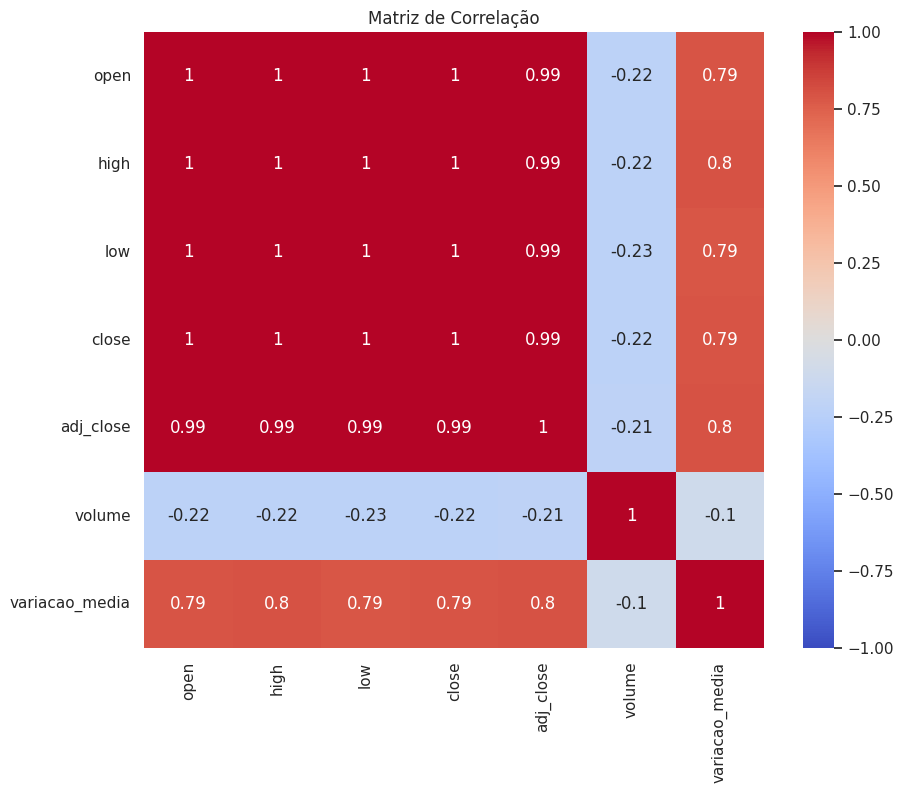

In [64]:
# Calcular a matriz de correlação
matrix_de_correlacao = df_classificado[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'variacao_media']].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_de_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Interpretação da Matriz de Correlação
Correlação Próxima de 1 ou -1:

Valores de correlação próximos de 1 indicam uma forte correlação positiva, ou seja, quando uma variável aumenta, a outra também tende a aumentar.
Valores de correlação próximos de -1 indicam uma forte correlação negativa, ou seja, quando uma variável aumenta, a outra tende a diminuir.

Correlação Próxima de 0:

Valores de correlação próximos de 0 indicam pouca ou nenhuma correlação linear entre as variáveis.

**Análise:** A matriz de correlação revela que os preços das ações (open, high, low, close, adj_close) são altamente correlacionados entre si. A variação média tem uma correlação moderada a alta com os preços das ações, indicando que conforme os preços variam, a variação média também tende a variar na mesma direção.

Já as correlações entre o volume e os preços (open, high, low, close, adj_close) são baixas (em torno de -0.22 a -0.23). Isso indica que o volume de negociações tem pouca correlação com os preços das ações no seu conjunto de dados.

- Correlação entre a variável de volume e preço da ação no fechamento do dia.

In [93]:
# Agrupar os dados por empresa e somar os volumes
volume_por_empresa = df_classificado.groupby('company')['volume'].sum().reset_index()

# Renomear a coluna para 'volume_total' para clareza
volume_por_empresa = volume_por_empresa.rename(columns={'volume': 'volume_total'})

# Mesclar o DataFrame original com o DataFrame de volume total por empresa
df_classificado = df_classificado.merge(volume_por_empresa, on='company', how='left')

# Calcular a correlação entre volume_total e close
correlacao = df_classificado['volume_total'].corr(df_classificado['close'])

# Exibir o resultado
print(f"A correlação entre o volume total de ações negociadas por empresa e o valor da ação no fechamento do dia é de: {correlacao}")

A correlação entre o volume total de ações negociadas por empresa e o valor da ação no fechamento do dia é de: -0.22326217283626848


O resultado da correlação acima, indica que há uma correlação negativa fraca entre essas duas variáveis. Em termos práticos, isso sugere que, de maneira geral, quando o volume total de ações negociadas por uma empresa aumenta, o valor da ação no fechamento do dia tende a diminuir ligeiramente, e vice-versa. No entanto, essa correlação é fraca, então essa tendência não é muito forte ou consistente.

#**<font color = red>Visualizações:**



**1. Quantas empresas tenho em minha base de dados?**

In [66]:
# Número de empresas distintas
num_empresas = df_join['stock_symbol'].nunique()
print(f"Número de empresas distintas: {num_empresas}")

# Alternativamente, verificar o número de empresas distintas pelo nome
num_empresas_por_nome = df_join['company'].nunique()
print(f"Número de empresas distintas (por nome): {num_empresas_por_nome}")

Número de empresas distintas: 14
Número de empresas distintas (por nome): 14


In [86]:
# Criar um DataFrame com os nomes das empresas e seus respectivos símbolos
empresas_nomes_df = df_join[['company', 'stock_symbol']].drop_duplicates()

# Visualizar
print(tabulate(empresas_nomes_df, headers=["Empresa", "Sigla"], tablefmt="grid"))

+-------+---------------------------------------------+---------+
|       | Empresa                                     | Sigla   |
+=======+=============================================+=========+
|     0 | Apple Inc.                                  | AAPL    |
+-------+---------------------------------------------+---------+
|  3271 | Adobe Inc.                                  | ADBE    |
+-------+---------------------------------------------+---------+
|  6542 | Amazon.com, Inc.                            | AMZN    |
+-------+---------------------------------------------+---------+
|  9813 | Salesforce, Inc.                            | CRM     |
+-------+---------------------------------------------+---------+
| 13084 | Cisco Systems, Inc.                         | CSCO    |
+-------+---------------------------------------------+---------+
| 16355 | Alphabet Inc.                               | GOOGL   |
+-------+---------------------------------------------+---------+
| 19626 | 

**2. De que período são os dados?**

In [68]:
# Encontrar o período dos dados
data_inicial = df_join['date'].min()
data_final = df_join['date'].max()
print(f"Período dos dados: de {data_inicial} a {data_final}")

# Encontrar o período dos dados em anos
ano_inicio = df_join['year'].min().astype(int)
ano_fim = df_join['year'].max().astype(int)
print(f"Total de {ano_fim - ano_inicio} anos")

Período dos dados: de 2010-01-04 00:00:00 a 2023-01-24 00:00:00
Total de 13 anos


**3. Classificação das Empresas: Alta Volatilidade (empresas com grande variação de preço das ações) Baixa Volatilidade (empresas com baixa variação de preço nas ações)**

A volatilidade se refere à variação dos preços de um ativo ao longo do tempo. No contexto do mercado de ações, a volatilidade mede a intensidade e a frequência das oscilações nos preços das ações.

- **Alta Volatilidade**: Indica que o preço de uma ação varia muito em um curto período de tempo. Isso pode significar maiores riscos, mas também maiores oportunidades de ganho¹.
- **Baixa Volatilidade**: Indica que o preço de uma ação varia pouco ao longo do tempo, sugerindo um comportamento mais estável e previsível².

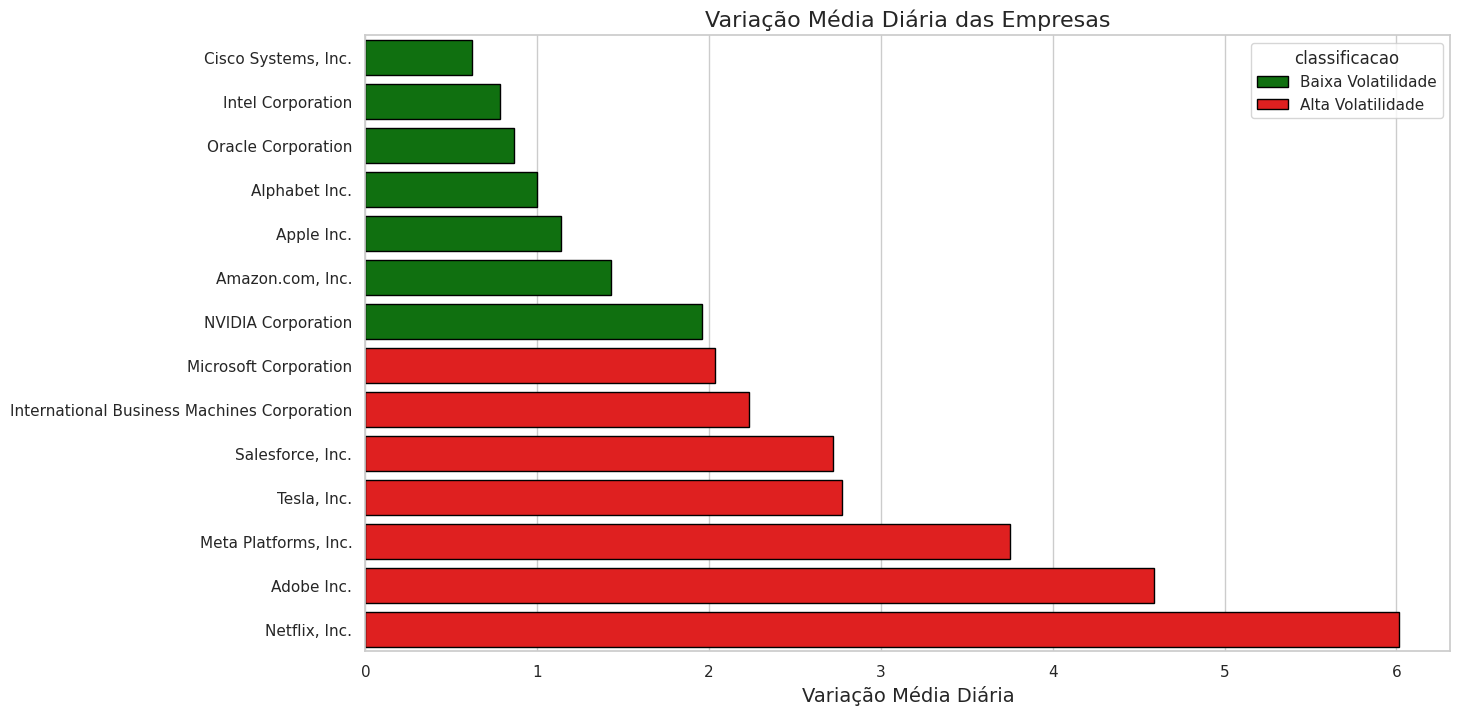

In [38]:
# Gráficos para mostrar a distribuição de volatilidade.
# Definir o palete de cores para as classificações
cores = {'Baixa Volatilidade': 'green', 'Alta Volatilidade': 'red'}

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Ordenar as empresas pela variação média (do menor para o maior)
variacao_media_por_empresa = variacao_media_por_empresa.sort_values(by='variacao_media', ascending=True)

# Criar o gráfico de barras sem a variável 'hue'
plt.figure(figsize=(14, 8))
sns.barplot(
    x='variacao_media',
    y='company',
    hue='classificacao',
    data=variacao_media_por_empresa,
    palette=cores,
    edgecolor='black'
)

# Adicionar título e rótulos aos eixos
plt.title('Variação Média Diária das Empresas', fontsize=16)
plt.xlabel('Variação Média Diária', fontsize=14)
plt.ylabel('')

# Mostrar o gráfico
plt.show()

Visualização do Comportamento dos Preços de fechamento das ações ao Longo do Tempo

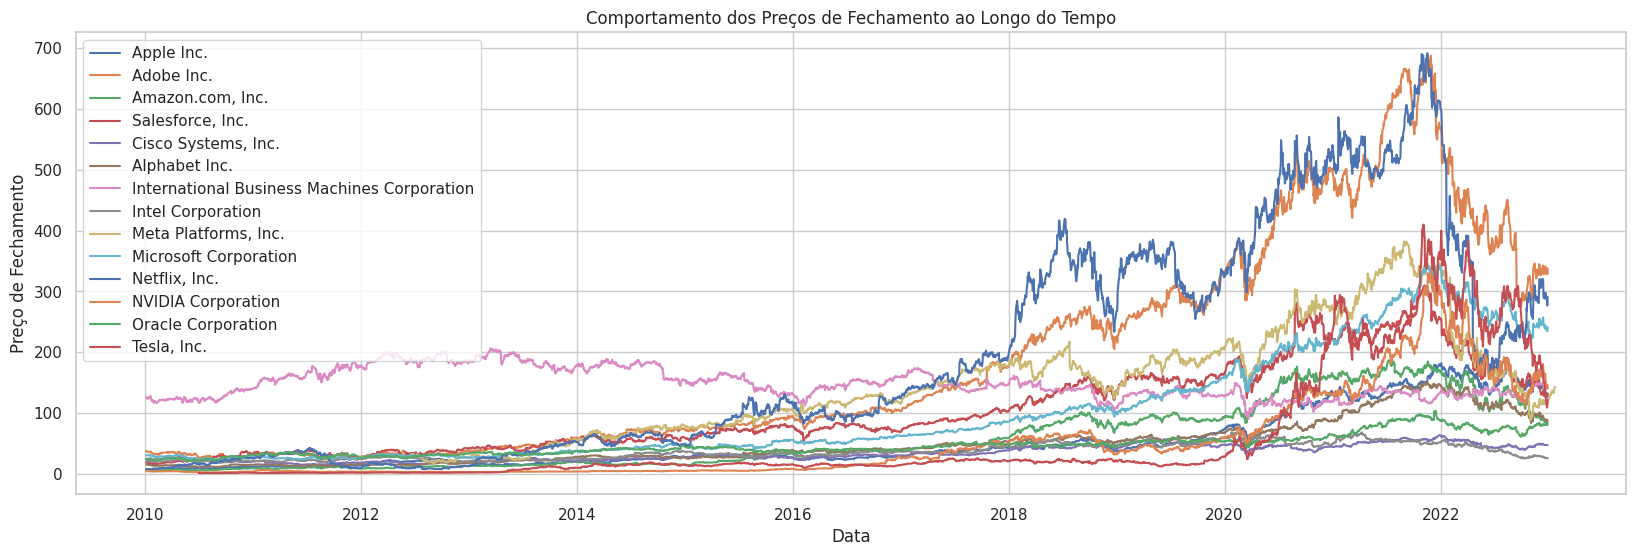

In [71]:
# Converter a coluna 'date' para o tipo datetime
df_classificado['date'] = pd.to_datetime(df_classificado['date'])

# Plotar o comportamento dos preços de fechamento ao longo do tempo para todas as empresas
plt.figure(figsize=(20, 6))
for company in df_classificado['company'].unique():
    company_data = df_classificado[df_classificado['company'] == company]
    plt.plot(company_data['date'], company_data['close'], label=company)

plt.title('Comportamento dos Preços de Fechamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

Gráfico do calculo do Risco Relativo, indica que há uma maior variabilidade nas ações após o ano de 2013. Reforçando a ideia do gráfico de linhas anterior.

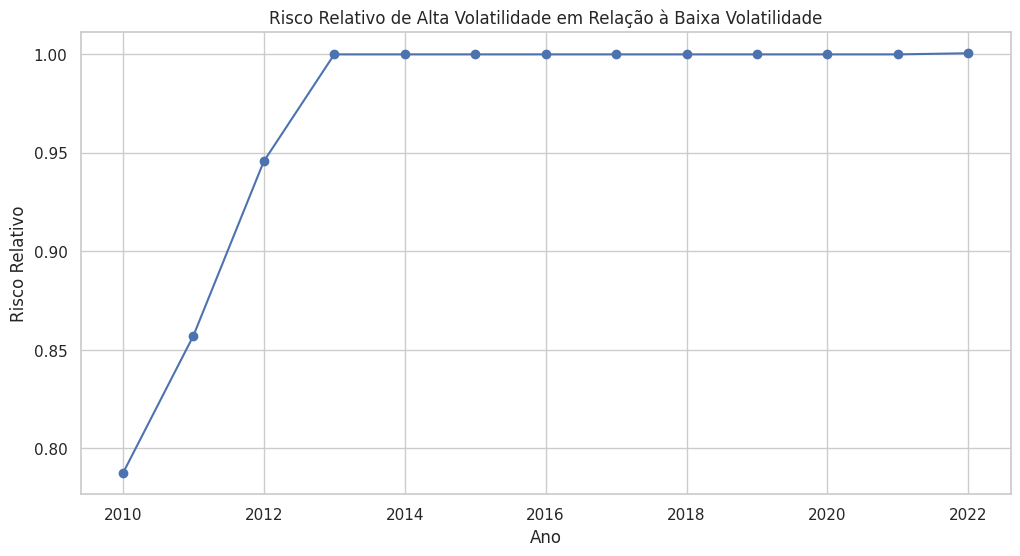

In [40]:
# Plotar o risco relativo ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(risco_relativo.index, risco_relativo, marker='o')
plt.title('Risco Relativo de Alta Volatilidade em Relação à Baixa Volatilidade')
plt.xlabel('Ano')
plt.ylabel('Risco Relativo')
plt.grid(True)
plt.show()

**4. Tendência de Preços: Analisar a evolução dos preços das ações ao longo do tempo para cada empresa.**

O preço ajustado geralmente leva em conta eventos como desdobramentos de ações, dividendos e outras distribuições, permitindo uma comparação mais precisa ao longo do tempo. Os dados são ajustados utilizando multiplicadores de divisão e dividendos apropriados, seguindo os padrões do Price Research Center (CRSP).

- close: O preço no fechamento do mercado, ajustado por splits.

- adj_close: O preço do fechamento após os ajustes para todas as distribuições de dividendos aplicáveis.

[*********************100%%**********************]  4 of 4 completed


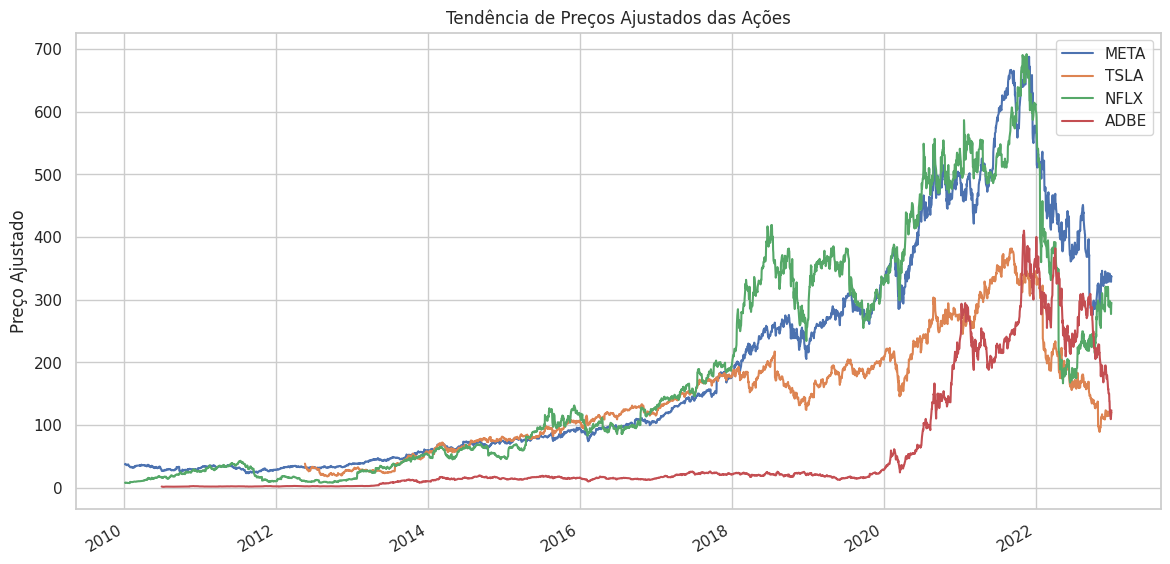

In [41]:
# Baixar dados de ações das 4 empresas com maior volatilidade
tickers = ['META', 'TSLA', 'NFLX', 'ADBE']
df_classificado = yf.download(tickers, start='2010-01-01', end='2023-01-01')

# Plotar preços de fechamento
df_classificado['Adj Close'].plot(figsize=(14, 7))
plt.title('Tendência de Preços Ajustados das Ações')
plt.xlabel('')
plt.ylabel('Preço Ajustado')
plt.legend(tickers)
plt.show()

[*********************100%%**********************]  4 of 4 completed


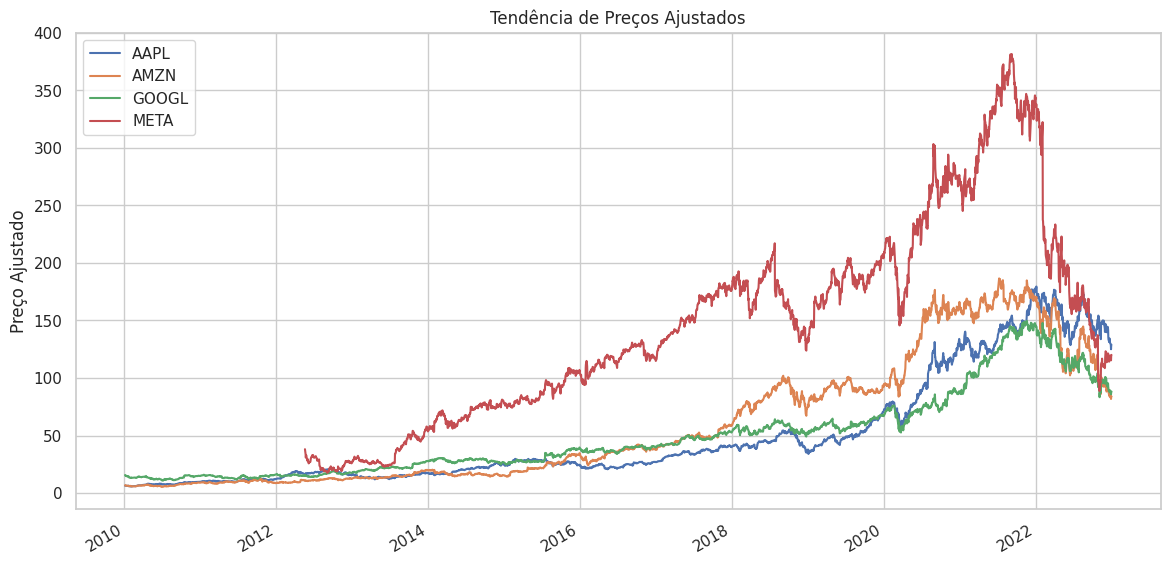

In [42]:
# Baixar dados de ações das 4 maiores empresas da base de dados
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META']
data = yf.download(tickers, start='2010-01-01', end='2023-01-01')

# Plotar preços de fechamento
data['Adj Close'].plot(figsize=(14, 7))
plt.title('Tendência de Preços Ajustados')
plt.xlabel('')
plt.ylabel('Preço Ajustado')
plt.legend(tickers)
plt.show()

**5. Volume de Ações por Ano**

- Porcentagem de ações (volume por dia) negociadas por empresa.

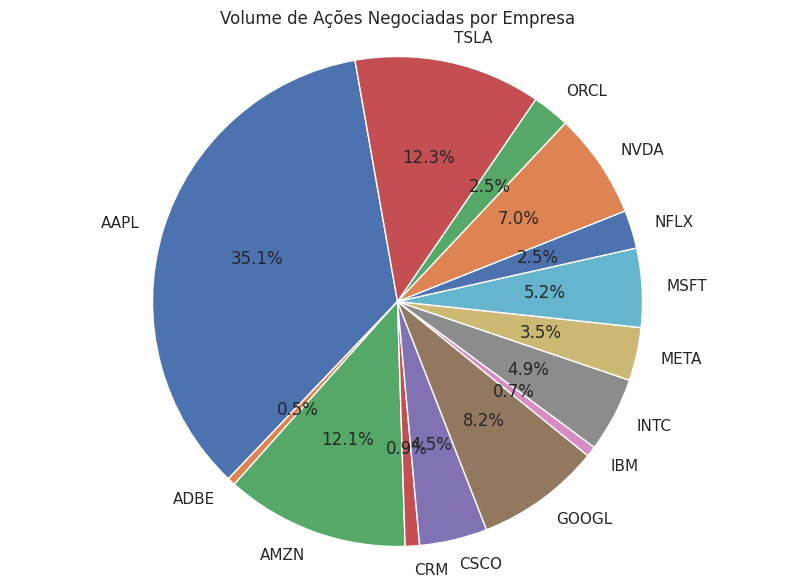

In [77]:
# Agrupar os dados por empresa e somar os volumes
volume_por_empresa = df_classificado.groupby('stock_symbol')['volume'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(volume_por_empresa, labels=volume_por_empresa.index, autopct='%1.1f%%', startangle=100)
plt.title('Volume de Ações Negociadas por Empresa')
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

# Salvar o gráfico como uma imagem
plt.savefig('grafico_pizza_volume.png')
plt.show()

No grafico de pizza acima podemos notar que a empresa que mais negocia ações na bolsa e a Apple (AAPL) com um total sde 35,1% de ações presente na base de dados, seguida pela Tesla (TSLA) com um total de 12,3% de ações negociadas.  

In [84]:
# Agrupar os dados por empresa e somar os volumes
volume_por_empresa = df_classificado.groupby('company')['volume'].sum()

# Calcular o volume total
volume_total = volume_por_empresa.sum()

# Calcular a porcentagem de cada volume em relação ao volume total
volume_por_empresa_percent = (volume_por_empresa / volume_total) * 100

# Ordenar os dados por volume em ordem decrescente
volume_por_empresa_percent = volume_por_empresa_percent.sort_values(ascending=False)

# Exibir a tabela
print(tabulate(volume_por_empresa_percent.reset_index(), headers=["Empresa", "Volume (%)"], tablefmt="grid"))

+----+---------------------------------------------+--------------+
|    | Empresa                                     |   Volume (%) |
+====+=============================================+==============+
|  0 | Apple Inc.                                  |    35.1006   |
+----+---------------------------------------------+--------------+
|  1 | Tesla, Inc.                                 |    12.3244   |
+----+---------------------------------------------+--------------+
|  2 | Amazon.com, Inc.                            |    12.0971   |
+----+---------------------------------------------+--------------+
|  3 | Alphabet Inc.                               |     8.2418   |
+----+---------------------------------------------+--------------+
|  4 | NVIDIA Corporation                          |     6.95727  |
+----+---------------------------------------------+--------------+
|  5 | Microsoft Corporation                       |     5.20589  |
+----+------------------------------------------

- Quantidade de ações registradas na base de dados por ano.

In [78]:
# Contar o número de registros por ano
contagem_por_ano = df_classificado['year'].value_counts().sort_index()

# Converter para DataFrame para fácil manipulação com plotly
df_contagem_por_ano = pd.DataFrame({
    'Ano': contagem_por_ano.index,
    'Quantidade de Registros': contagem_por_ano.values
})

# Criar o gráfico de barras interativo
fig = px.bar(
    df_contagem_por_ano,
    x='Ano',
    y='Quantidade de Registros',
    text='Quantidade de Registros',  # Adiciona rótulos de dados
    title='Quantidade de Registros de Ações por Ano',
    labels={'Ano': 'Ano', 'Quantidade de Registros': 'Quantidade de Registros'},
    color='Quantidade de Registros',  # Cor das barras com base na quantidade
    color_continuous_scale='sunset'  # Escala de cores contínua
)

# Atualizar o layout para adicionar rótulos de dados
fig.update_traces(texttemplate='%{text}', textposition='outside', marker=dict(line=dict(color='black', width=1)))

# Atualizar o layout do gráfico
fig.update_layout(
    xaxis_title='',
    yaxis_title='Quantidade de Registros',
    xaxis=dict(tickmode='linear')  # Garante que todos os anos são exibidos
)

# Mostrar o gráfico
fig.show()

#**<font color = red>Concluções:**

1. Dados Segmentados e classificados, após a segmentação obteve-se o seguinte resultado:

- Empresas com Alta Volatilidade:

Netflix, Inc. (6.01406)
Adobe Inc. (4.58704)
Meta Platforms, Inc. (3.75419)
Tesla, Inc. (2.77384)
Salesforce, Inc. (2.72033)
International Business Machines Corporation (2.23051)
Microsoft Corporation (2.03165)

- Empresas com Baixa Volatilidade:

NVIDIA Corporation (1.95862)
Amazon.com, Inc. (1.42752)
Apple Inc. (1.13733)
Alphabet Inc. (0.996761)
Oracle Corporation (0.865478)
Intel Corporation (0.781996)
Cisco Systems, Inc. (0.617298)

**Conclusão**

As empresas listadas sob Alta Volatilidade apresentam maiores variações nos seus valores, o que pode implicar maiores riscos e potenciais retornos para investidores.
As empresas sob Baixa Volatilidade têm variações menores, sugerindo maior estabilidade nos seus valores, mas talvez menos potencial de retorno rápido.
Netflix, Inc. é a empresa com a maior volatilidade, enquanto Cisco Systems, Inc. é a que apresenta menor volatilidade na lista apresentada.

2. No cálculo do Risco Relativo em resumo dos Resultados por Ano, nos anos de
2010 a 2012: O risco relativo aumentou de 0.787415 em 2010 para 0.945714 em 2012, indicando que a probabilidade de alta volatilidade estava se aproximando da probabilidade de baixa volatilidade, mas ainda era menor.

Em 2013 a 2021: O risco relativo é exatamente 1, o que significa que a probabilidade de alta volatilidade é igual à de baixa volatilidade durante esses anos.

No ano de 2022: O risco relativo é ligeiramente maior que 1 (1.00057), indicando uma leve tendência de maior probabilidade de alta volatilidade em comparação com baixa volatilidade.

Já no ano de 2023: O valor é infinito (inf), indicando que não houve ocorrências de baixa volatilidade, resultando em um denominador zero e, portanto, um risco relativo infinito.

**Conclusão**

Existe uma estabilidade (2013-2021): Durante esse período, a probabilidade de alta volatilidade e baixa volatilidade foi a mesma, indicando uma estabilidade no comportamento de volatilidade das empresas.

Mudança em 2022: Um pequeno aumento no risco relativo, sugerindo uma ligeira tendência de maior volatilidade.

Anomalia em 2023: O valor inf para 2023 sugere que todas as empresas ou quase todas estavam em alta volatilidade, porem ao analisarmos a base de dados podemos perceber que os dados referente a esse ano são insufucientes para a análise,

Este padrão pode ser útil para investidores que estão monitorando a volatilidade do mercado ao longo do tempo e desejam entender como a probabilidade de eventos de alta volatilidade tem mudado em relação à baixa volatilidade.

3. Em nossa analise do risco relativo comparando as caracteristicas Alta e Baixa Volatilidade a coluna risco mostra a probabilidade de um aumento no preço ajustado de fechamento para cada classificação de volatilidade:

Alta Volatilidade: A probabilidade de um aumento no preço ajustado de fechamento para ações de alta volatilidade é aproximadamente 51,82%.

Baixa Volatilidade: A probabilidade de um aumento no preço ajustado de fechamento para ações de baixa volatilidade é aproximadamente 52,08%.

**Conclusão**

Os resultados sugerem que, embora as probabilidades de aumento no preço ajustado de fechamento sejam relativamente semelhantes entre os grupos de alta e baixa volatilidade, ações de baixa volatilidade têm uma leve vantagem em termos de probabilidade de aumento, conforme indicado pelo risco relativo ligeiramente superior a 1.

4. A matriz de correlação revela que os preços das ações (open, high, low, close, adj_close) são altamente correlacionados entre si. A variação média tem uma correlação moderada a alta com os preços das ações, indicando que conforme os preços variam, a variação média também tende a variar na mesma direção.

Já as correlações entre o volume de ações negociadas e os preços (open, high, low, close, adj_close) são baixas (em torno de -0.22 a -0.23). Isso indica que o volume de negociações tem pouca correlação com os preços das ações no seu conjunto de dados.

**Conclusão**

Em resumo, enquanto os preços das ações e a variação média estão fortemente relacionados, o volume de negociações não tem uma correlação significativa com os preços das ações.


##**Recomendações**

Verificar perfil do investidor com base na volatilidade das ações.

Baixa Volatilidade
Definição: Baixa volatilidade indica que o preço de um ativo muda de forma mais suave e previsível ao longo do tempo.
Características: Pequenas oscilações de preço, com movimentos mais estáveis.
Impacto: Menor risco de perdas significativas, mas também menores oportunidades de ganhos elevados13.
Em resumo, a ***baixa volatilidade está ligada a maior estabilidade e menores riscos***.


Alta Volatilidade
Definição: Alta volatilidade significa que o preço de um ativo pode mudar rapidamente e de forma significativa em um curto período de tempo.
Características: Grandes oscilações de preço, tanto para cima quanto para baixo.
Impacto: Pode oferecer grandes oportunidades de ganhos, mas também apresenta um risco elevado de perdas.
Em resumo, a ***alta volatilidade está associada a maiores riscos e potenciais retornos***.

E assim indicar empresas que possam fazer sentido com o perfil do investidor, um perfil mais contido ou mais arrojado, um perfil que busca um investimento de alto risco, ou um perfil que busca um investimento de baixo risco.

###Empresas de investimentos de baixo risco:
- AAPL

**Apple Inc.**

Baixa Volatilidade

Baixo Risco

- AMZN

**Amazon.com, Inc.**

Baixa Volatilidade

Baixo Risco

- CSCO

**Cisco Systems, Inc.**

Baixa Volatilidade

Baixo Risco

- GOOGL

**Alphabet Inc.**

Baixa Volatilidade

Baixo Risco

- INTC

**Intel Corporation**

Baixa Volatilidade

Baixo Risco

- NVDA

**NVIDIA Corporation**

Baixa Volatilidade

Baixo Risco

- ORCL

**Oracle Corporation**

Baixa Volatilidade

Baixo Risco

###Empresas de investimento de alto risco:
- ADBE

**Adobe Inc.**

Alta Volatilidade

Alto Risco

- CRM

**Salesforce, Inc.**

Alta Volatilidade

Alto Risco

- IBM

**International Business Machines Corporation**

Alta Volatilidade

Alto Risco

- META

**Meta Platforms, Inc.**

Alta Volatilidade

Alto Risco

- MSFT

**Microsoft Corporation**

Alta Volatilidade

Alto Risco

- NFLX

**Netflix, Inc.**

Alta Volatilidade

Alto Risco

- TSLA

**Tesla, Inc.**

Alta Volatilidade

Alto Risco


#**<font color = red>Referências Bibliografias:**

¹: [Volatilidade: o que é e quais são seus efeitos no mercado?](https://www.suno.com.br/guias/volatilidade/)

²: [Volatilidade do mercado: o que é e quais seus efeitos?](https://blog.genialinvestimentos.com.br/o-que-e-volatilidade/)

(1) Volatilidade: o que é, qual a sua importância e como calcular. https://statusinvest.com.br/termos/v/volatilidade.

(2) Volatilidade: o que é e quais são seus efeitos no mercado? - Suno. https://www.suno.com.br/guias/volatilidade/.

(3) Volatilidade: o que é, qual a sua importância e como calcular. https://bing.com/search?q=defini%c3%a7%c3%a3o+de+volatilidade+no+mercado+de+a%c3%a7%c3%b5es.

(4) Volatilidade do mercado: o que é e quais seus efeitos? - Genial. https://blog.genialinvestimentos.com.br/o-que-e-volatilidade/.

(5) O que é volatilidade e sua influência nos investimentos - Remessa Online. https://www.remessaonline.com.br/blog/o-que-e-volatilidade/.


Fonte: 31/07/2024